# In Hospital Mortality Prediction

# 1. Project Definition

# Project overview

The predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients remain poorly characterized.
In this project, I created validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.



# Problem Statement
The primary outcome of the study was in-hospital mortality, defined as the vital status at the time of hospital discharge in survivors and non-survivors; the tasks involved are the following:
1. registration and preprocess all-cause in-hospital mortality among ICU-admitted HF patients.
2. Train a classifier that can predicion
3. Make the classifier 
4. predict survivors and non-survivors

The final application is expected to be useful for rediction model for all-cause in-hospital mortality among ICU-admitted HF patients

# Metrics
Accuracy : is a common metric for binary classifiers; it takes into account both true positives and true
negatives with equal weight

accuracy = true positives + true negatives/dataset size

This metric was used when evaluating the prediction  all-cause in-hospital  among ICU-admitted HF patients in survivors and non-survivors


# 2. Analysis

## Data Exploration

Using Structured Query Language queries (PostgreSQL, version 9.6)
demographic characteristics, vital signs, and laboratory values data were extracted from the following tables in the MIMIC III dataset: ADMISSIONS, PATIENTS, ICUSTAYS, DICD DIAGNOSIS, DIAGNOSISICD, LABEVENTS, DLABIEVENTS, CHARTEVENTS, DITEMS, NOTEEVENTS, and OUTPUTEVENTS.
Based on previous studies 7-9 13-15, clinical relevance, and general availability at the time of presentation, we extracted the following data:

demographic characteristics (age at the time of hospital admission, sex, ethnicity, weight, and height);

vital signs (heart rate, (HR), systolic blood pressure [SBP], diastolic blood pressure [DBP], mean blood pressure, respiratory rate, body temperature, saturation pulse oxygen [SPO2], urine output [first 24 h]);

comorbidities (hypertension, atrial fibrillation, ischemic heart disease, diabetes mellitus, depression, hypoferric anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease [COPD]); 

and laboratory variables (hematocrit, red blood cells, mean corpuscular hemoglobin [MCH], mean corpuscular hemoglobin concentration [MCHC], mean corpuscular volume [MCV], red blood cell distribution width [RDW], platelet count, white blood cells, neutrophils, basophils, lymphocytes, prothrombin time [PT], international normalized ratio [INR], NT-proBNP, creatine kinase, creatinine, blood urea nitrogen [BUN] glucose, potassium, sodium, calcium, chloride, magnesium, the anion gap, bicarbonate, lactate, hydrogen ion concentration [pH], partial pressure of CO2 in arterial blood, and LVEF).


using Structured Query Language (SQL) with PostgreSQL (version 9.6). Demographic characteristics and vital signs extracted were recorded during the ﬁrst 24 hours of each admission and laboratory variables were measured during the entire ICU stay. Comorbidities were identified using ICD-9 codes. For variable data with multiple measurements, the calculated mean value was included for analysis. The primary outcome of the study was in-hospital mortality, defined as the vital status at the time of hospital discharge in survivors and non-survivors.

Target Variable - Outcome
(0 - Alive , 1 - Death)

In [68]:
# 1. Import libraries 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression



In [69]:
# load dataset
df = pd.read_csv('data01.csv')
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [70]:
#check dataset shape and dtypes
print(df.shape)
print(df.dtypes)

(1177, 51)
group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW              

In [71]:
##Check if there is null value 
print(df.isnull().sum())

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [72]:
#check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [73]:

#find the correlation between variables using corr function

corr=df.corr()
print(corr)

                             group        ID   outcome       age   gendera  \
group                     1.000000  0.001859 -0.024220  0.000077  0.011808   
ID                        0.001859  1.000000  0.040398 -0.026546 -0.030853   
outcome                  -0.024220  0.040398  1.000000  0.064510 -0.022690   
age                       0.000077 -0.026546  0.064510  1.000000  0.081705   
gendera                   0.011808 -0.030853 -0.022690  0.081705  1.000000   
BMI                      -0.041432  0.046694 -0.062086 -0.384185  0.024556   
hypertensive             -0.052413 -0.001704 -0.072441  0.177060  0.008776   
atrialfibrillation       -0.002997 -0.014781  0.100975  0.291003 -0.036957   
CHD with no MI            0.005263  0.035383 -0.014694  0.037594 -0.079159   
diabetes                  0.025042  0.016410 -0.049997 -0.089103 -0.035943   
deficiencyanemias         0.006558 -0.027295 -0.099513  0.015099  0.080868   
depression                0.023679  0.029687 -0.060883 -0.094543

In [74]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [75]:
#group Death
death = df[(df['outcome'] > 0) ]
death

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
16,1,191838,1.0,83,2,NaN,1,0,0,0,...,132.818182,8.888889,94.700000,14.500000,2.055556,7.368333,28.800000,0.700000,54.916667,30
21,1,182755,1.0,78,2,37.851434,1,0,0,1,...,142.818182,8.320000,107.454546,12.545455,2.010000,7.333333,26.363636,0.750000,52.000000,55
27,1,171473,1.0,89,1,NaN,1,1,0,0,...,142.555556,7.400000,111.555556,12.333333,1.862500,7.440000,22.666667,0.800000,35.000000,55
37,1,133885,1.0,89,2,19.980509,1,1,1,0,...,143.166667,8.816667,110.833333,16.333333,1.900000,7.302000,20.000000,0.825000,39.200000,55
40,1,168911,1.0,81,1,NaN,0,1,0,0,...,130.833333,9.350000,100.833333,20.200000,2.475000,7.244000,15.800000,0.842857,43.500000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,2,199786,1.0,43,2,19.682579,0,0,0,0,...,137.666667,8.200000,103.666667,22.500000,2.200000,7.090000,17.000000,6.500000,54.000000,30
1145,2,115432,1.0,80,1,32.582245,1,1,0,1,...,141.181818,8.387500,102.090909,20.000000,2.555556,NaN,23.454545,NaN,NaN,55
1147,2,134382,1.0,66,2,18.996620,0,0,0,0,...,137.777778,8.666667,94.444444,8.750000,2.371429,7.370000,38.500000,NaN,69.000000,55
1164,2,190064,1.0,76,1,26.197235,0,1,0,0,...,143.153846,8.700000,109.538461,12.923077,2.276923,7.240000,24.769231,NaN,62.000000,55


In [76]:
death.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,159.000000,159.000000,159.0,159.000000,159.000000,114.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,142.000000,159.000000,143.000000,144.000000,159.000000
mean,1.270440,153734.578616,1.0,76.238994,1.496855,28.609919,0.635220,0.578616,0.075472,0.358491,...,138.201392,8.235897,103.098958,15.464411,2.167376,7.355352,24.002300,2.389305,44.110314,47.924528
std,0.445591,28673.571142,0.0,13.219883,0.501570,9.923685,0.482889,0.495341,0.264986,0.481072,...,5.020249,0.621380,6.004320,3.517705,0.287261,0.074890,5.419173,1.428588,12.674105,14.769344
min,1.000000,101197.000000,1.0,28.000000,1.000000,13.777805,0.000000,0.000000,0.000000,0.000000,...,124.461539,6.700000,87.066667,8.555556,1.450000,7.090000,12.857143,0.533333,23.000000,15.000000
25%,1.000000,127522.500000,1.0,69.500000,1.000000,23.909123,0.000000,0.000000,0.000000,0.000000,...,135.138095,7.758333,99.229167,12.961538,1.961250,7.313382,20.696429,1.358333,36.000000,35.000000
50%,1.000000,156776.000000,1.0,80.000000,1.000000,27.140086,1.000000,1.000000,0.000000,0.000000,...,138.600000,8.241667,103.666667,14.714286,2.126667,7.348482,23.250000,2.000000,41.737500,55.000000
75%,2.000000,179507.000000,1.0,86.000000,2.000000,30.657769,1.000000,1.000000,0.000000,1.000000,...,142.433155,8.659804,107.477273,17.505051,2.304545,7.404904,26.696970,3.080000,47.750000,55.000000
max,2.000000,199912.000000,1.0,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,149.000000,9.720000,117.315790,25.400000,3.254545,7.500000,40.571429,7.250000,93.000000,75.000000


In [77]:
death.corr()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
group,1.000000,-0.046906,NaN,-0.066912,0.046308,-0.110436,0.167236,-0.025248,-0.066750,0.135371,...,0.061873,0.037470,0.103221,0.053883,0.116421,-0.233194,-0.079286,-0.056916,0.105119,0.004083
ID,-0.046906,1.000000,NaN,0.012292,0.028247,-0.007293,0.118225,0.051871,-0.005568,-0.002785,...,-0.088089,-0.099068,0.035175,-0.011041,-0.034530,-0.026636,-0.114448,0.026799,-0.085962,0.035176
outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.066912,0.012292,NaN,1.000000,0.084112,-0.396039,0.289364,0.386620,0.061667,0.043169,...,0.180774,0.013293,0.236168,-0.046199,-0.075522,0.118751,-0.065312,-0.078027,-0.122305,-0.020296
gendera,0.046308,0.028247,NaN,0.084112,1.000000,-0.051576,-0.057029,-0.145478,-0.093443,-0.008413,...,0.056630,-0.060039,0.156713,-0.041069,-0.131487,-0.108960,-0.097431,0.105763,0.009597,0.093095
BMI,-0.110436,-0.007293,NaN,-0.396039,-0.051576,1.000000,-0.054214,-0.220857,-0.072696,0.025714,...,0.072955,0.039407,-0.136792,-0.118028,0.076055,0.069591,0.255667,-0.136916,0.227324,-0.015819
hypertensive,0.167236,0.118225,NaN,0.289364,-0.057029,-0.054214,1.000000,0.014811,0.018665,0.212304,...,0.106412,-0.021368,0.049557,0.086875,-0.062896,0.025691,-0.021377,-0.041732,-0.005881,0.039599
atrialfibrillation,-0.025248,0.051871,NaN,0.386620,-0.145478,-0.220857,0.014811,1.000000,0.099167,-0.026059,...,0.023207,0.144746,-0.009791,-0.036078,-0.021789,0.065825,0.050397,-0.049618,-0.002438,0.018119
CHD with no MI,-0.066750,-0.005568,NaN,0.061667,-0.093443,-0.072696,0.018665,0.099167,1.000000,0.034661,...,-0.066894,0.078077,-0.136609,0.028853,0.012429,0.107424,0.064937,-0.023711,-0.042567,-0.121441
diabetes,0.135371,-0.002785,NaN,0.043169,-0.008413,0.025714,0.212304,-0.026059,0.034661,1.000000,...,-0.106636,0.017627,-0.208069,0.150039,-0.013206,0.032824,0.045343,0.045794,0.020969,-0.081683


In [78]:
#group Live
live = df[(df['outcome'] < 1) ]
live

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [79]:
live.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,848.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1016.000000,1017.000000,1017.000000,1017.000000,743.000000,1017.000000,805.000000,739.000000,1017.000000
mean,1.302852,150304.534907,0.0,73.705015,1.529990,30.400463,0.730580,0.431662,0.087512,0.430678,...,139.005763,8.543400,102.165894,13.682885,2.112923,7.382962,27.367043,1.758232,45.813068,48.832842
std,0.459718,29089.314346,0.0,13.445044,0.499345,9.228304,0.443877,0.495552,0.282723,0.495415,...,3.984233,0.552364,5.214090,2.406004,0.244908,0.064893,4.980867,0.848205,12.708450,12.553962
min,1.000000,100213.000000,0.0,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.800000,80.266667,6.636364,1.400000,7.145000,14.200000,0.500000,18.750000,15.000000
25%,1.000000,125047.000000,0.0,65.000000,1.000000,24.364069,0.000000,0.000000,0.000000,0.000000,...,137.000000,8.191477,99.000000,12.153846,1.955556,7.340000,24.250000,1.200000,37.333333,40.000000
50%,1.000000,151364.000000,0.0,77.000000,2.000000,28.479451,1.000000,0.000000,0.000000,0.000000,...,139.333333,8.540000,102.384615,13.600000,2.090909,7.383333,27.000000,1.600000,43.066667,55.000000
75%,2.000000,175001.000000,0.0,85.000000,2.000000,33.912922,1.000000,1.000000,0.000000,1.000000,...,141.500000,8.888889,105.375000,15.100000,2.228571,7.430000,30.181818,2.100000,51.000000,55.000000
max,2.000000,199952.000000,0.0,98.000000,2.000000,91.176653,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


# 2.Exploratory Visualization


The plot below shows how the legible, age are distributed among the dataset. 
This is helpful for predicting how distribution density with a statistic

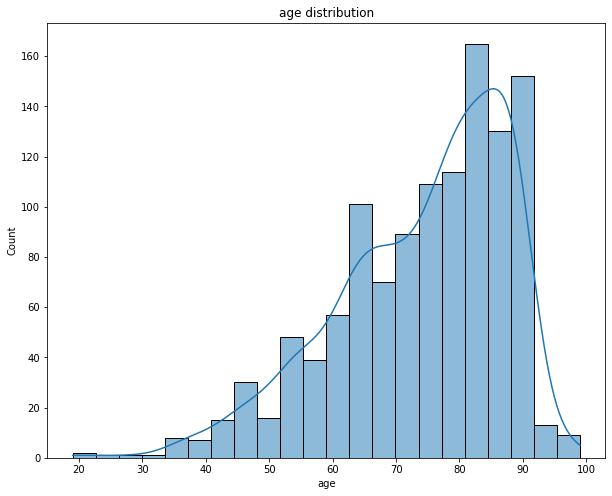

count    1177.000000
mean       74.055225
std        13.434061
min        19.000000
25%        65.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: age, dtype: float64


In [80]:
# visualize numerical of dataset

plt.figure(figsize=(10,8))
plt.title('age distribution')
sns.histplot(df['age'], kde=True, fill=True)
plt.show()

print(df['age'].describe())

The above figure shows that the majority of patients are of the older age group

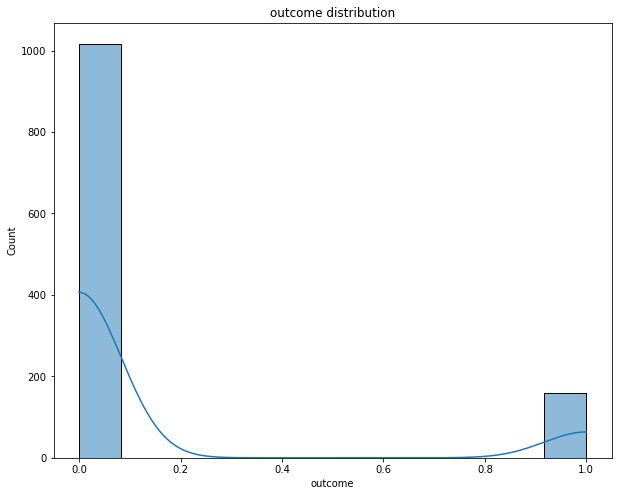

count    1176.000000
mean        0.135204
std         0.342087
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: outcome, dtype: float64


In [81]:
# visualize numerical of dataset

plt.figure(figsize=(10,8))
plt.title('outcome distribution')
sns.histplot(df['outcome'], kde=True, fill=True)
plt.show()

print(df['outcome'].describe())

In [82]:
import plotly.express as px
fig = px.histogram(death, x=['age', 'gendera', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate', 'Lactic acid', 'PCO2', 'EF'], marginal="box", )
fig.show()

The above figure shows that count variables effect pation 

# Methodology

# Data Preprocessing

In [83]:
# remove null value
df.dropna(inplace=True)



In [84]:
#modife type of dataset 
df= df.astype("int64")

In [85]:
print(df)

      group      ID  outcome  age  gendera  BMI  hypertensive  \
0         1  125047        0   72        1   37             0   
2         1  109787        0   83        2   26             0   
3         1  130587        0   43        2   83             0   
5         1  154653        0   76        1   24             1   
6         1  194420        0   72        1   39             1   
...     ...     ...      ...  ...      ...  ...           ...   
1088      2  127201        0   83        1   20             1   
1090      2  149303        0   37        1   26             0   
1091      2  130745        0   61        1   29             1   
1092      2  177737        0   71        2   32             1   
1094      2  122715        0   37        1   26             0   

      atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                      0               0         1  ...           138   
2                      0               0         0  ...           140   


In [86]:
print(df.dtypes)

group                       int64
ID                          int64
outcome                     int64
age                         int64
gendera                     int64
BMI                         int64
hypertensive                int64
atrialfibrillation          int64
CHD with no MI              int64
diabetes                    int64
deficiencyanemias           int64
depression                  int64
Hyperlipemia                int64
Renal failure               int64
COPD                        int64
heart rate                  int64
Systolic blood pressure     int64
Diastolic blood pressure    int64
Respiratory rate            int64
temperature                 int64
SP O2                       int64
Urine output                int64
hematocrit                  int64
RBC                         int64
MCH                         int64
MCHC                        int64
MCV                         int64
RDW                         int64
Leucocyte                   int64
Platelets     

In [87]:
asc = df[(df['outcome'] > 0) ]
asc

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
21,1,182755,1,78,2,37,1,0,0,1,...,142,8,107,12,2,7,26,0,52,55
64,1,130265,1,83,1,38,1,0,0,1,...,141,8,94,10,2,7,40,0,68,40
86,1,193313,1,74,2,34,1,0,0,1,...,141,8,103,16,2,7,25,1,42,55
94,1,182008,1,53,1,25,1,0,0,1,...,143,8,100,11,2,7,34,1,64,55
101,1,122223,1,78,1,23,0,0,0,0,...,130,8,101,12,1,7,20,1,29,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,2,133225,1,68,1,34,0,0,0,1,...,143,7,108,11,2,7,27,2,48,35
1075,2,168789,1,89,2,24,1,1,0,1,...,136,7,105,18,2,7,16,3,32,55
1077,2,169885,1,71,2,26,0,1,0,0,...,135,7,104,17,2,7,17,3,31,40
1079,2,154566,1,55,2,36,1,0,0,0,...,140,7,104,17,1,7,23,3,46,55


In [88]:
import plotly.express as px
fig = px.histogram(df, x="age", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

WE CAN CLEARLY SEE THAT THE MOST DEATHS ARE FROM AGES 88-89 AND ALSO AS AGE IS INCREASED THE NUMBER OF DEATHS ARE INCREASING

In [89]:
df1 = df.dropna(subset=['BMI'])
fig = px.histogram(df, x="BMI", color="outcome", marginal="box", hover_data=df1.columns)
fig.show()

WE CAN SEE A SHARP RISE IN NUMBER OF DEATHS AFTER THE 18-20 RANGE THE BMI RANGE OF 25-29 IS OVERWEIGHT THE BMI RANGE OF 30+ IS OBESE WE CAN SEE OVERWEIGHT AND OBESE ARE HAVING RELATIVELY HIGHER NUMBER OF DEATHS

In [90]:
df1 = df.dropna(subset=['SP O2'])
fig = px.histogram(df, x="SP O2", color="outcome", marginal="box", hover_data=df1.columns)
fig.show()

In [91]:
import plotly.graph_objs as go
diabetic = df[df["diabetes"]==1]
non_diabetic = df[df["diabetes"]==0]


labels = ['diabetic - Survived','diabetic - Not Survived', "non diabetic -  Survived", "non diabetic - Not Survived"]
values = [len(diabetic[df["outcome"]==0]),len(diabetic[df["outcome"]==1]),
          len(non_diabetic[df["outcome"]==0]),len(non_diabetic[df["outcome"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()

<ipython-input-91-a79313acad28>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-91-a79313acad28>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



CLEARLY THE AMOUNT OF NON DIABETIC SURVIVED IS MORE THAN DIABETIC SURVIVED

In [92]:
import plotly.graph_objs as go
depression = df[df["depression"]==1]
non_depression = df[df["depression"]==0]


labels = ['depression - Survived','depression - Not Survived', "without depression -  Survived", "without depression - Not Survived"]
values = [len(depression[df["outcome"]==0]),len(depression[df["outcome"]==1]),
          len(non_depression[df["outcome"]==0]),len(non_depression[df["outcome"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()

<ipython-input-92-dc2de7c373df>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-92-dc2de7c373df>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



CLEARLY THE AMOUNT OF PEOPLE SURVIVED WITHOUT DEPRESSION IS FAR MORE THAN THOSE SURVIVED WITH DEPRESSRION

In [93]:
rf = df[df["Renal failure"]==1]
non_rf = df[df["Renal failure"]==0]


labels = ['Renal failure - Survived','Renal failure - Not Survived', "without Renal failure  -  Survived", "without Renal failure  - Not Survived"]
values = [len(rf[df["outcome"]==0]),len(rf[df["outcome"]==1]),
          len(non_rf[df["outcome"]==0]),len(non_rf[df["outcome"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()

<ipython-input-93-d73a9c3b5041>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-93-d73a9c3b5041>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Implementation

In [94]:
#Build a machine learning pipeline

In [95]:
#split dataset in features and target variable
feature_cols = ['age','gendera','BMI','hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD','heart rate','Systolic blood pressure','Diastolic blood pressure','Respiratory rate','temperature','SP O2','Urine output','hematocrit','RBC','MCH','MCHC','MCV','RDW','Leucocyte','Platelets','Neutrophils','Basophils','Lymphocyte','PT','INR','NT-proBNP','Creatine kinase','Creatinine','Urea nitrogen','glucose','Blood potassium','Blood sodium','Blood calcium','Chloride','Anion gap','Magnesium ion','PH','Bicarbonate','Lactic acid','PCO2','EF']

X = df[feature_cols] # Features
y = df.outcome # Target variable

In [96]:
df.isnull().sum()
df.isna().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [97]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

LogisticRegression

In [98]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Huawei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [99]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95,  4],
       [ 7,  1]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

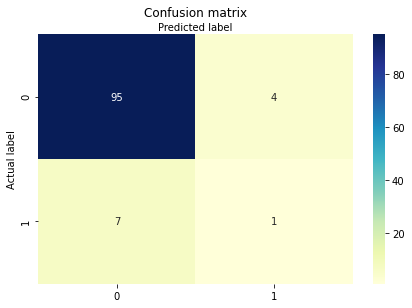

In [100]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.897196261682243
Precision: 0.2
Recall: 0.125


Support Vector Machine Algorithm

In [102]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

In [103]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[93,  6],
       [ 5,  3]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

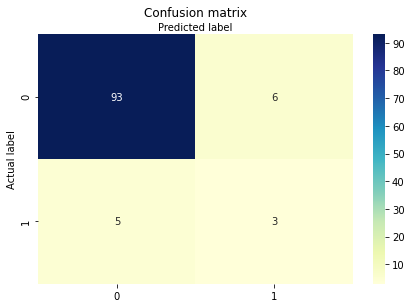

In [104]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.897196261682243
Precision: 0.3333333333333333
Recall: 0.375


Nearest Neighbor algorithm

In [106]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifierkn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierkn.fit(X_train, y_train)
y_pred=classifierkn.predict(X_test)

Accuracy: 0.9065420560747663
Precision: 0.3333333333333333
Recall: 0.25


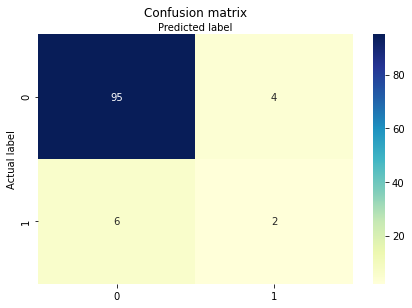

In [108]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Kernel SVM Algorithm

In [109]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred=classifier2.predict(X_test)

Accuracy: 0.9252336448598131
Precision: 0.0
Recall: 0.0


C:\Users\Huawei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



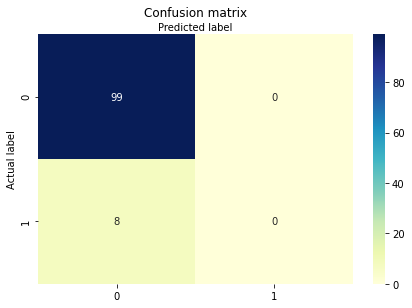

In [110]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [111]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
y_pred=classifier3.predict(X_test)

Accuracy: 0.9345794392523364
Precision: 0.6666666666666666
Recall: 0.25


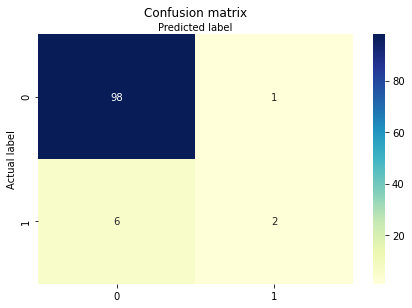

In [112]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Decision Tree Algorithm

In [113]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)
y_pred=classifier4.predict(X_test)

Accuracy: 0.9158878504672897
Precision: 0.42857142857142855
Recall: 0.375


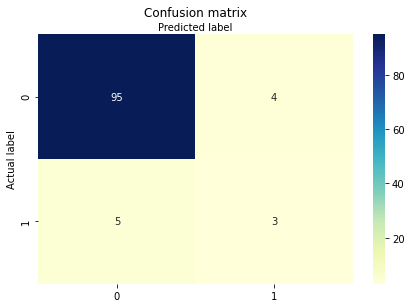

In [114]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Random Forest Classification algorithm

In [115]:

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)
y_pred=classifierkn.predict(X_test)

Accuracy: 0.9065420560747663
Precision: 0.3333333333333333
Recall: 0.25


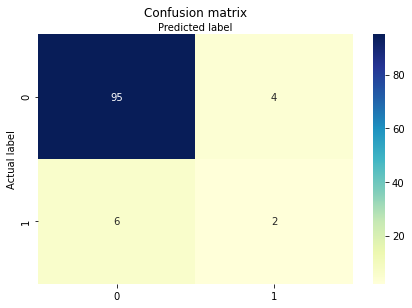

In [116]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Refinement

We have different types of classification algorithms in Machine Learning for Predicting the best results :-
1. Logistic Regression — 89%
2. Nearest Neighbor — 90%
3. Support Vector Machines — 89%
4. Kernel SVM — 92%
5. Naive Bayes — 93%
6. Decision Tree Algorithm — 91%
7. Random Forest Classification — 90%

We can see that Naive Bayes algorithm gives the best results for our dataset. 
To get the initial result, We can see that Naive Bayes algorithm gives the best results for our dataset; the result was an accuracy around
93 %. 

In the Evaluation and validation section we will use the KFold class which makes it easier to implement cross-validation

# Result

# 1.Model Evaluation and Validation

After applying the different classification models, we have got below accuracies with different models:
1. Logistic Regression — 89%
2. Nearest Neighbor — 90%
3. Support Vector Machines — 89%
4. Kernel SVM — 92%
5. Naive Bayes — 93%
6. Decision Tree Algorithm — 91%
7. Random Forest Classification — 90%


we used Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.


That k-fold cross validat
on is a procedure used to estimate the skill of the model on new data.

The general procedure is as follows:

1.Shuffle the dataset randomly.

2.Split the dataset into k groups.

3.For each unique group:

     1.Take the group as a hold out or test data set.
  
     2.Take the remaining groups as a training data set.
  
     3.Fit a model on the training set and evaluate it on the test set.
  
     4.Retain the evaluation score and discard the model.
  
4.Summarize the skill of the model using the sample of model evaluation scores.

In the code we used 5-Fold cross-validation

sklearn.model_selection module provides us with KFold class which makes it easier to implement cross-validation. KFold class has split method which requires a dataset to perform cross-validation on as an input argument.

In [127]:
#logistic regression 

In [128]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import numpy as np
    
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X): 
    X_train , X_test 
    y_train , y_test 
     
    logreg.fit(X_train,y_train)
    pred_values = logreg.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.897196261682243, 0.897196261682243, 0.897196261682243, 0.897196261682243, 0.897196261682243]
Avg accuracy : 0.8971962616822429


C:\Users\Huawei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Huawei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Huawei\anaconda3\lib\site-packa

In [130]:
#Nearest Neighbor

In [131]:
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test 
    y_train , y_test 
     
    classifierkn.fit(X_train,y_train)
    pred_values = classifierkn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9065420560747663, 0.9065420560747663, 0.9065420560747663, 0.9065420560747663, 0.9065420560747663]
Avg accuracy : 0.9065420560747663


In [132]:
# SVM 
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test 
    y_train , y_test 
     
    svm.fit(X_train,y_train)
    pred_values = svm.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.897196261682243, 0.897196261682243, 0.897196261682243, 0.897196261682243, 0.897196261682243]
Avg accuracy : 0.8971962616822429


In [134]:
#Kernel SVM
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test 
    y_train , y_test 
     
    classifier2.fit(X_train,y_train)
    pred_values = classifier2.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9252336448598131, 0.9252336448598131, 0.9252336448598131, 0.9252336448598131, 0.9252336448598131]
Avg accuracy : 0.9252336448598131


In [135]:
#Naive Bayes
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test 
    y_train , y_test 
     
    classifier3.fit(X_train,y_train)
    pred_values = classifier3.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9345794392523364, 0.9345794392523364, 0.9345794392523364, 0.9345794392523364, 0.9345794392523364]
Avg accuracy : 0.9345794392523364


In [136]:
#Decision Tree Algorithm
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test 
    y_train , y_test 
     
    classifier4.fit(X_train,y_train)
    pred_values = classifier4.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9158878504672897, 0.9158878504672897, 0.9158878504672897, 0.9158878504672897, 0.9158878504672897]
Avg accuracy : 0.9158878504672897


In [137]:
#Random Forest Classification
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test 
    y_train , y_test 
     
    classifier5.fit(X_train,y_train)
    pred_values = classifier5.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9439252336448598, 0.9439252336448598, 0.9439252336448598, 0.9439252336448598, 0.9439252336448598]
Avg accuracy : 0.9439252336448598


# 2.Justification

As mentioned in the initial result section.
All models achieved good accuracy, but Naive Bayes it was the best accuracy for the current data, around 93%. 
After evaluation and validation, we found the Naive Bayes model give an accuracy result 93% 
So finally we have built our classification model and prediction, we can see that Random Forest Classification algorithm gives the best results for our dataset, the accuracy results are around 94%.

# Conclusion

reflection
The process used for this project can be summarized using the following steps:
1. Initial problem and related general data sets were found
2. The data was previously downloaded and processed (fragmented)
3. A performance metric has been created for the classifier
4. More than one classifier was used using the data
5. Algorithms have been compared
6. The best data prediction classifier has been tested
I found steps 4 and 5 the most difficult, as I had to learn about the healthcare data and all techniques I was using I was not familiar with before the project.
As for the most interesting aspects of the project, I'm very glad that I found the Hospital Mortality Prediction datasets, as I'm sure they'll be useful for later projects/experiments. I'm also happy about
getting to use predition techniques .

# Improvement

1. To achieve the optimal user experience, using Predicting the most important biological factors causing death
2. Improving the accuracy test of the model used to perform the best case prediction
3. Experience using a deep learning model to predict situations
4. Compare it to other models
5. Testing the best model gives high accuracy